<a href="https://colab.research.google.com/github/swastikarm/Machine-Learning/blob/main/Principal_Component_Analysis%5B3%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Develop a program to implement Principal Component Analysis (PCA) for reducing the dimensionality of the Iris dataset from 4 features to 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [3]:
df = pd.read_csv('/content/testdata (1).csv')
df.head()

,Sl. No,Temperature,Preasure
0,1,2,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [14]:
temperature = df.iloc[:, 1:2].values #Input
preasure = df.iloc[:, 2].values #output

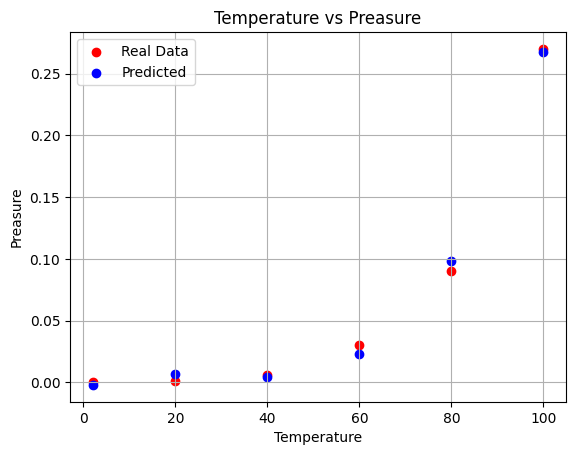

In [16]:
polyreg = PolynomialFeatures(degree=3)
X_poly = polyreg.fit_transform(temperature) #Transforming the input data into polynomial features
linreg = LinearRegression()
linreg.fit(X_poly, preasure) #Fitting the model with the transformed data
#Predicting the output with the transformed input data
predicted_preasure = linreg.predict(X_poly)

#Visualising the results
plt.scatter(temperature, preasure, color='red')
plt.scatter(temperature, predicted_preasure, color='blue')
plt.title('Temperature vs Preasure')
plt.xlabel('Temperature')
plt.ylabel('Preasure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

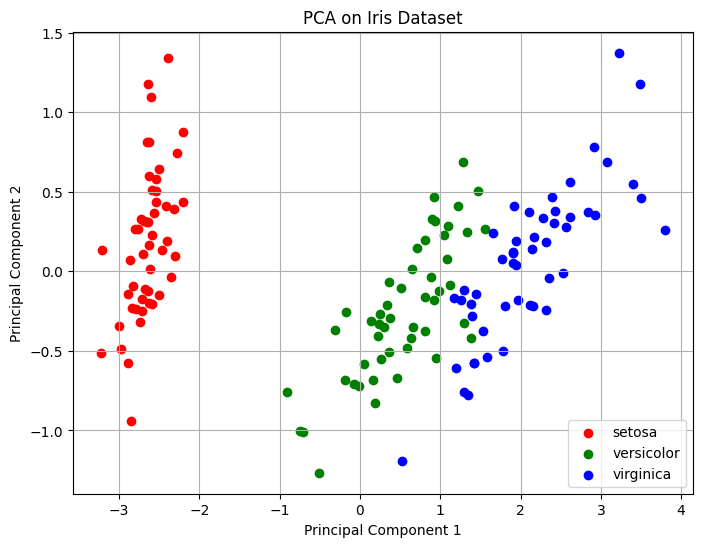

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Load the Iris dataset
iris = load_iris()
data = iris.data
labels = iris.target
label_names = iris.target_names
# Convert to a DataFrame for better visualization
iris_df = pd.DataFrame(data, columns=iris.feature_names)
# Perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)
# Create a DataFrame for the reduced data
reduced_df = pd.DataFrame(data_reduced, columns=['Principal Component 1','Principal Component 2'])
reduced_df['Label'] = labels
# Plot the reduced data
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, label in enumerate(np.unique(labels)):
 plt.scatter(
 reduced_df[reduced_df['Label'] == label]['Principal Component 1'],
 reduced_df[reduced_df['Label'] == label]['Principal Component 2'],
 label=label_names[label],
 color=colors[i]
 )
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [18]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
labels = iris.target
label_names = iris.target_names

# Get the number of unique species (using labels)
num_species = len(np.unique(labels))
print(f"Number of species: {num_species}")

# Get the number of unique species (using label_names)
num_species = len(label_names)
print(f"Number of species: {num_species}")

Number of species: 3
Number of species: 3


In [19]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
label_names = iris.target_names

# Print the names of the species
print("Species names:", label_names)

Species names: ['setosa' 'versicolor' 'virginica']


<ipython-input-20-7ebe166fceae>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


Degree: 3
RMSE: 4.296541309256212
R^2 Score: 0.6383217814069444


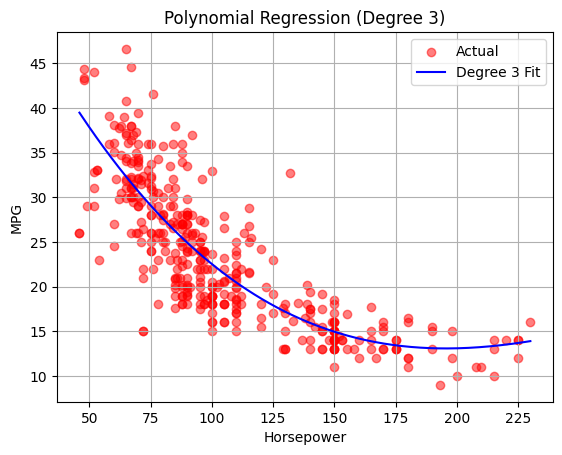

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
columns = ['mpg','cylinders','displacement','horsepower','weight',
           'acceleration','model year','origin','car name']
df = pd.read_csv(url, delim_whitespace=True, names=columns)

# Handle missing values
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)

# Feature: horsepower, Target: mpg
X = df[['horsepower']].values
y = df['mpg'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression
degree = 3  # Change this to try different degrees
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_pred = model.predict(X_poly_test)

# Evaluation
print(f'Degree: {degree}')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 Score:', r2_score(y_test, y_pred))

# Plotting
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_seq_poly = poly.transform(X_seq)
y_seq = model.predict(X_seq_poly)

plt.scatter(X, y, color='red', alpha=0.5, label='Actual')
plt.plot(X_seq, y_seq, color='blue', label=f'Degree {degree} Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.grid()
plt.show()
